### Cancer Diagnostics


Using set of breast cancer data, create a model to predict breast cancer. Also, what traits are most indicative of whether or not an individual will be diagnosed?

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#### Exploratory Analysis

Context of Data

Start with Basics

Plot Numerical Distributions

Plot Categorical Distributions

Plot Segmentations

Study Correlations


In [45]:
labels = ['scn','clp_ths', 'ucl_shp', 'ucl_sze', 'mrg_ahn', 'sec_sze', 'bld_cmn', 'nrm_nci', 'mts', 'malignant']
df = pd.read_csv('data/breast_cancer.csv', names=labels, header=None)
df.shape

(699, 10)

#### Data Cleaning
 - Remove Unwanted observations
 - Fix Structural Errors
 - Filter Unwanted Outliers
 - Handle Missing Data

In [46]:
df.sec_sze = df.sec_sze.where(df.sec_sze  != '?', other = 0)
df.sec_sze = df.sec_sze.apply(lambda x : int(x))

#### Feature Engineering
 - Infuse Domain Knowledge
 - Create Interaction Features
 - Combine Sparse Classes
 - Add Dummy Variables
 - Remove Unused Features
 
 analytical base table (ABT)

In [47]:
# tranform target to binary 0 or 1 with dct
dct = {2:0, 4:1}
df.malignant = df.malignant.apply(lambda x : dct[x])

In [48]:
X = df.drop(['malignant'], axis=1)
y = df['malignant']
X = OneHotEncoder(categories='auto').fit_transform(X)
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [53]:
names = ['logit', 'Random Forest', 'SVM classifier']
scores = {}
clfs = [clf_lrn, clf_rft, clf_svc]

for (i, clf) in enumerate(clfs):
    scores[i] = round(clf.score(X_tst, y_tst))
scores

{0: 0.9285714285714286, 1: 0.9357142857142857, 2: 0.95}

#### Hyperparameter Selection

In [61]:
clf  = RandomForestClassifier(random_state=1, n_estimators = 100 )

In [62]:
param_grid = {'n_estimators': [10, 100, 500], 'min_samples_leaf': [1, 3, 5]}
prms =list(ParameterGrid(param_grid))

In [63]:
scores = {}
for (i,prm) in enumerate(prms):
    scores[i] = clf.set_params(**prm).fit(X_trn, y_trn).score(X_tst, y_tst)
scores  

{0: 0.9357142857142857,
 1: 0.9285714285714286,
 2: 0.9285714285714286,
 3: 0.9357142857142857,
 4: 0.9285714285714286,
 5: 0.9285714285714286,
 6: 0.9071428571428571,
 7: 0.9214285714285714,
 8: 0.9285714285714286}

In [76]:
importances = clf.set_params(**prms[0]).fit(X_trn, y_trn).feature_importances_
indices = np.argsort(importances)[::-1]

In [77]:
# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 10 (0.185135)
2. feature 71 (0.157512)
3. feature 20 (0.119855)
4. feature 51 (0.107529)
5. feature 60 (0.061752)
6. feature 39 (0.038561)
7. feature 81 (0.037033)
8. feature 9 (0.029868)
9. feature 19 (0.022847)
10. feature 61 (0.021886)
11. feature 0 (0.016387)
12. feature 30 (0.014962)
13. feature 41 (0.012811)
14. feature 21 (0.012807)
15. feature 72 (0.010940)
16. feature 62 (0.010247)
17. feature 80 (0.008778)
18. feature 26 (0.006838)
19. feature 29 (0.005669)
20. feature 65 (0.005583)
21. feature 27 (0.005270)
22. feature 23 (0.005079)
23. feature 32 (0.004843)
24. feature 37 (0.004417)
25. feature 58 (0.004357)
26. feature 50 (0.004314)
27. feature 24 (0.004128)
28. feature 52 (0.004080)
29. feature 3 (0.004032)
30. feature 12 (0.003847)
31. feature 64 (0.003825)
32. feature 82 (0.003606)
33. feature 25 (0.003568)
34. feature 89 (0.003425)
35. feature 31 (0.003409)
36. feature 78 (0.003298)
37. feature 4 (0.003073)
38. feature 75 (0.002978)
39. feat

In [71]:
ftr_imp.shape

(90,)

In [72]:
X.shape

(699, 90)

Sample code number            id number

Clump Thickness               1 - 10

Uniformity of Cell Size       1 - 10

Marginal Adhesion             1 - 10

Single Epithelial Cell Size   1 - 10

Bare Nuclei                   1 - 10

Bland Chromatin               1 - 10

Normal Nucleoli               1 - 10

Mitoses                       1 - 10

Class:                        (2 for benign, 4 for malignant)

In [32]:
df.sec_sze = df.sec_sze.where(df.sec_sze  != '?', other = 0)
df.sec_sze = df.sec_sze.apply(lambda x : int(x))

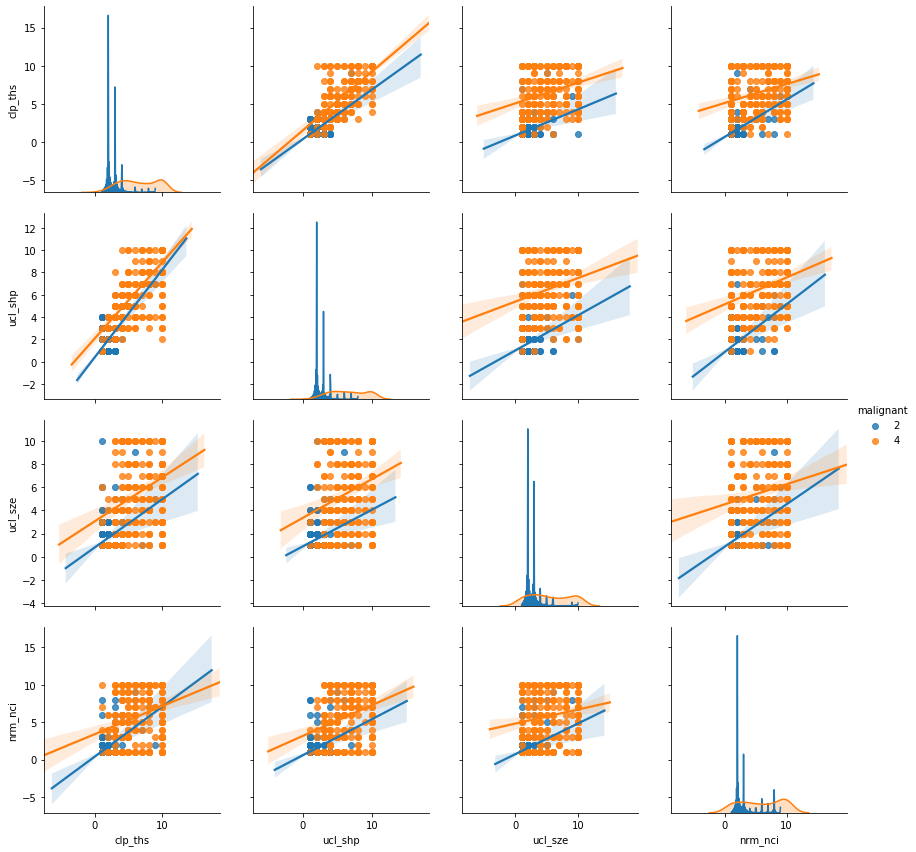

In [35]:
g = sns.pairplot(df, vars = ['clp_ths', 'ucl_shp', 'ucl_sze', 'nrm_nci'], hue = 'malignant', kind="reg", height = 3)

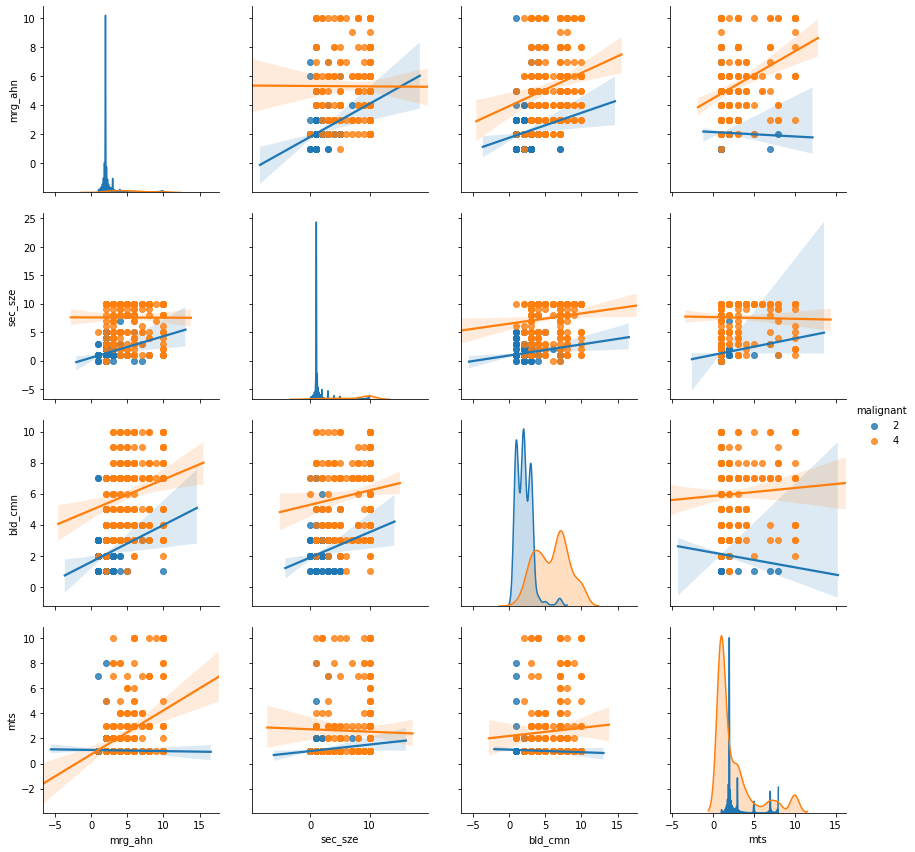

In [36]:
g = sns.pairplot(df, vars = ['mrg_ahn', 'sec_sze', 'bld_cmn', 'mts'], hue = 'malignant', kind="reg", height = 3)